In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from icedef import drift, metocean, simulator, plot, iceberg, test_case, timesteppers
from icedef import statoil_arcticnet_data as sd

#plt.rcParams['figure.figsize'] = (6, 6)
plot_dir = './plots/'
data_dir = './data/'

# B

# 12

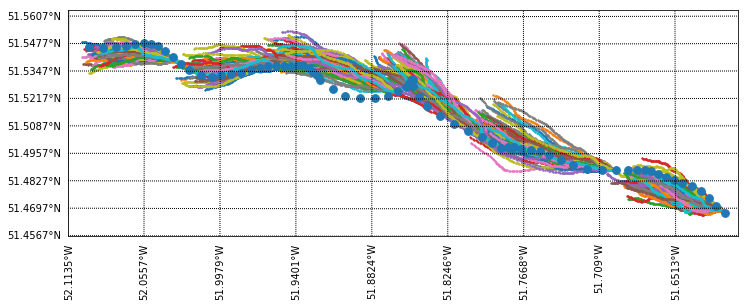

In [2]:
Cas = [1.35, 1.3, 1.3, 1.45, 0.95, 0.65]
Cws = [1.15, 1.2, 1.2, 1.05, 1.55, 1.85]

num_start_times = 6

tc = test_case.TestCaseB()

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 6

for j in range(num_start_times):
    
    tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = Cas[j]
        Cw = Cws[j]
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

In [3]:
for i in range(1, num_start_times + 1):
    if i == 1:
        start_index = 0
        end_index = 11
    else:
        start_index = (i-1) * 12 + 1
        end_index = i * 12 - 1
        
    sim.results.data[f'ref{i}'] = sim.results.data['reference'].where(
        (sim.results.data['reference'].time <= sim.results.data['reference']['time'].values[end_index])
        & (sim.results.data['reference'].time >= sim.results.data['reference']['time'].values[start_index]), drop=True)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7bc370518>)

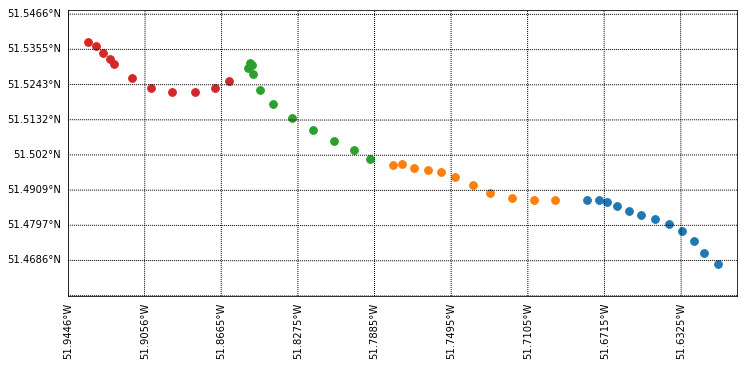

In [4]:
labels = ['ref1', 'ref2', 'ref3', 'ref4']
sizes = [60] * 4
sim.results.plot(labels, sizes=sizes)

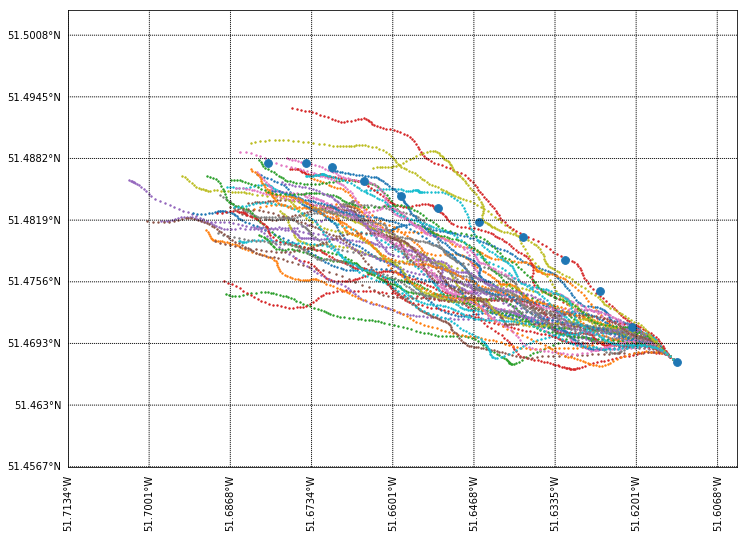

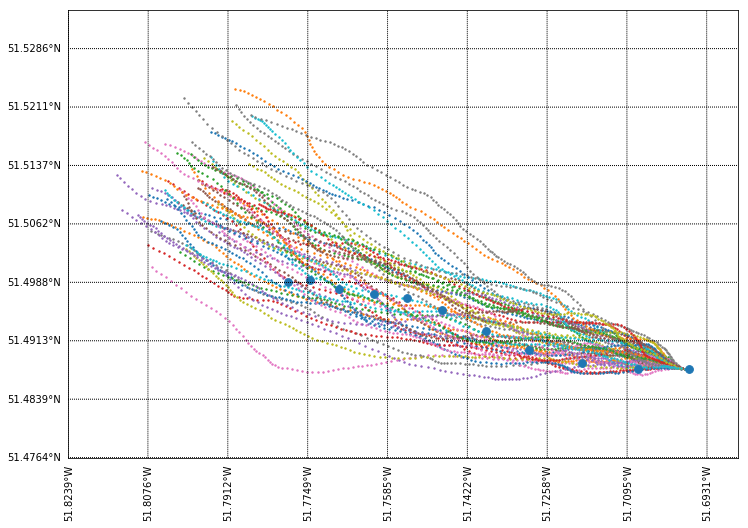

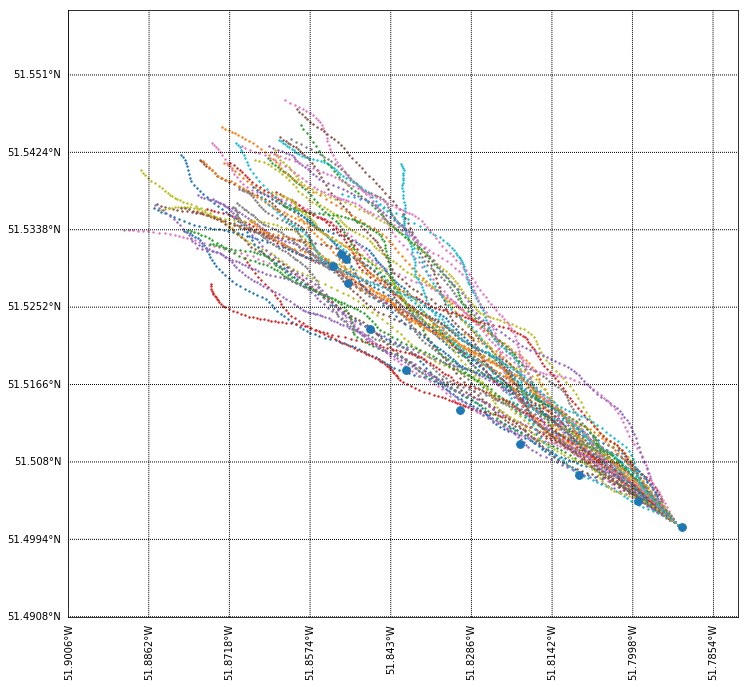

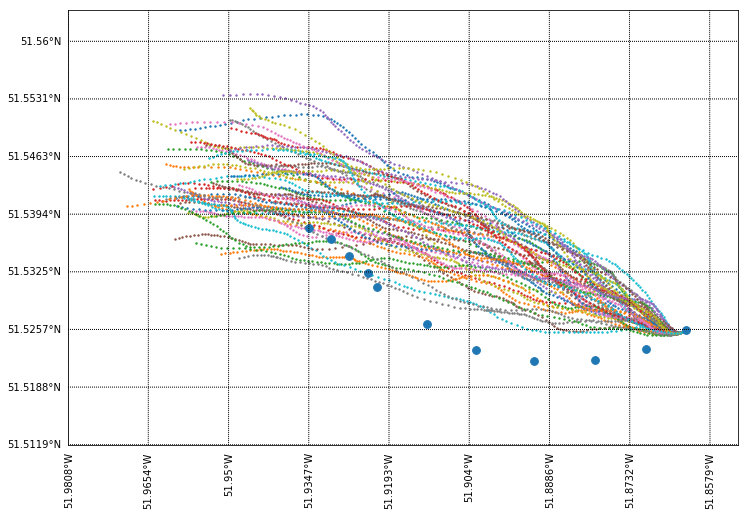

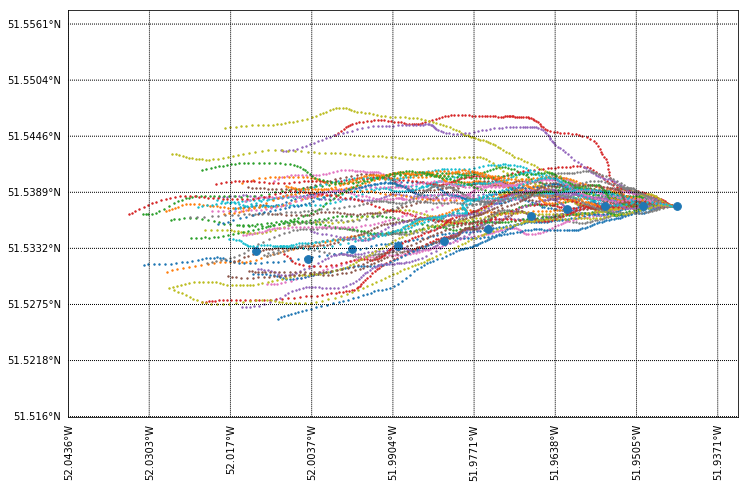

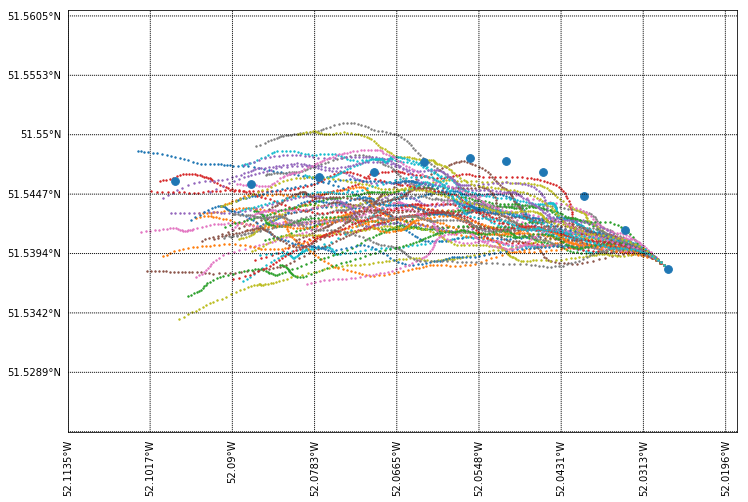

In [5]:
for j in range(num_start_times):
    labels = [str(i) for i in range(N*j, N*(j+1))] + [f'ref{j+1}']
    sizes = [2] * N + [60]
    sim.results.plot(labels, sizes=sizes)

## Perturbing Ca and Cw

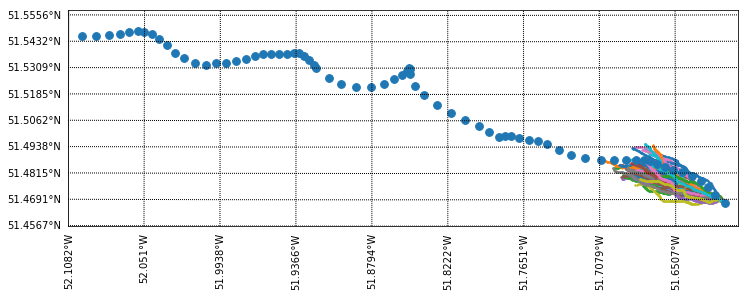

In [2]:
Cas = [1.35, 1.3, 1.3, 1.45, 0.95, 0.65]
Cws = [1.15, 1.2, 1.2, 1.05, 1.55, 1.85]

num_start_times = 1

tc = test_case.TestCaseB()

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

for j in range(num_start_times):
    
    tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = Cas[j]
        Cw = Cws[j]
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        run_sim_kwargs['percent_to_perturb_Ca_by'] = 30
        run_sim_kwargs['percent_to_perturb_Cw_by'] = 30
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

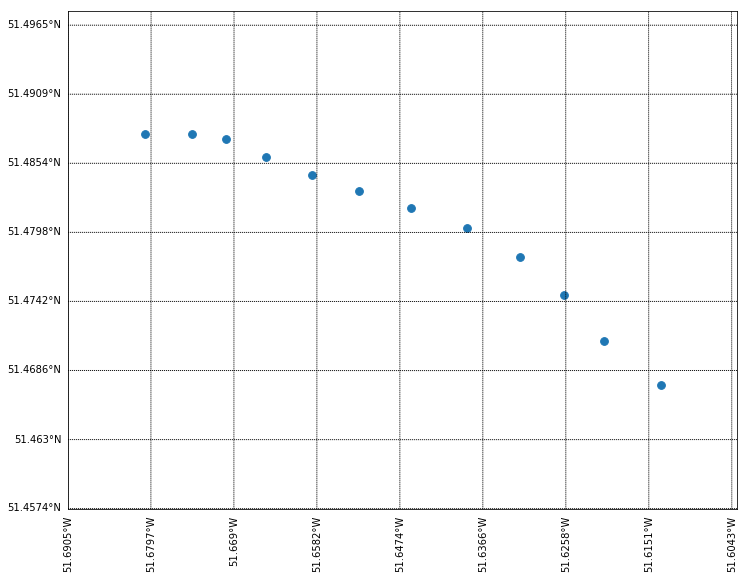

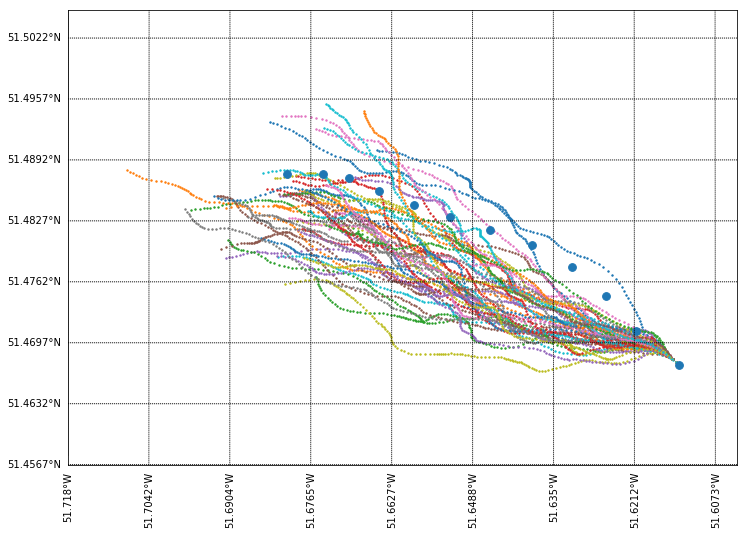

In [3]:
for i in range(1, num_start_times + 1):
    if i == 1:
        start_index = 0
        end_index = 11
    else:
        start_index = (i-1) * 12 + 1
        end_index = i * 12 - 1
        
    sim.results.data[f'ref{i}'] = sim.results.data['reference'].where(
        (sim.results.data['reference'].time <= sim.results.data['reference']['time'].values[end_index])
        & (sim.results.data['reference'].time >= sim.results.data['reference']['time'].values[start_index]), drop=True)

labels = ['ref1']#, 'ref2', 'ref3', 'ref4']
sizes = [60] * 4
sim.results.plot(labels, sizes=sizes)

for j in range(num_start_times):
    labels = [str(i) for i in range(N*j, N*(j+1))] + [f'ref{j+1}']
    sizes = [2] * N + [60]
    sim.results.plot(labels, sizes=sizes)

# 24

# C

# 12

# 24

# OPTIMIZING Ca and CW

In [2]:
def calc_mean_error(lats_lons, ref_lats_lons):
    
    # lats_lons and ref_lats_lons must be a list of xarray DataArrays with time as a dimension
    
    lats, lons = lats_lons
    ref_lats, ref_lons = ref_lats_lons
    
    n = len(ref_lats.values)
    
    errs = np.zeros(n)
    
    for i in range(n):
        ref_lat = ref_lats.values[i]
        ref_lon = ref_lons.values[i]
        time = ref_lats.time.values[i]
        lat = float(lats.interp(time=time, assume_sorted=True).values)
        lon = float(lons.interp(time=time, assume_sorted=True).values)
        errs[i] = np.sqrt((ref_lon - lon)**2 + (ref_lat - lat)**2)
    
    return np.mean(errs)

# B

In [23]:
tc = test_case.TestCase(beacon_id='20498', end_time=np.timedelta64(5, 'D'))

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62800a5588>)

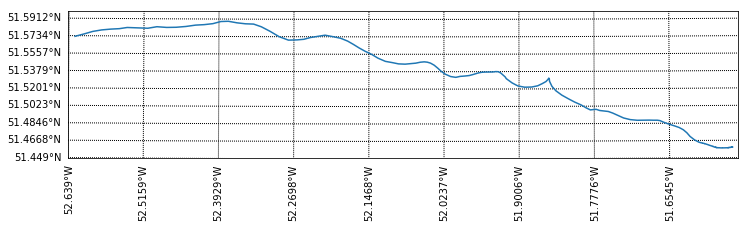

In [24]:
plot.plot_track((tc.ref_lats.values, tc.ref_lons.values), line_plot=True, sizes=60)

# 12 hour runs over 3 days

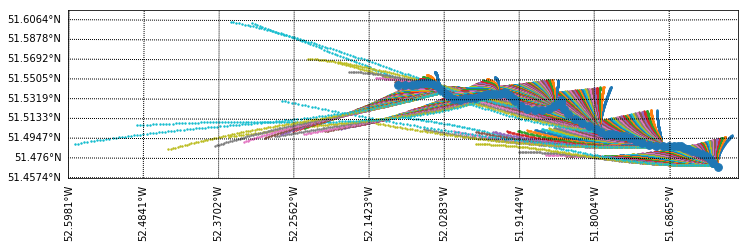

In [3]:
tc = test_case.TestCaseB()

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 6

err_dict = {'Ca': np.zeros((num_start_times, N)), 'Cw': np.zeros((num_start_times, N)), 'err': np.zeros((num_start_times, N))}

for j in range(num_start_times):
    
    #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = 0.001 * i * N
        Cw = 0.001 * N * N - 0.001 * i * N
        #Ca = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = Ca / 5
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)
        lats = sim.results.data[f'{i + (j * N)}']['latitude']
        lons = sim.results.data[f'{i + (j * N)}']['longitude']
        lats_lons = lats, lons
        err = calc_mean_error(lats_lons, ref_lats_lons)
        err_dict['Ca'][j][i] = Ca
        err_dict['Cw'][j][i] = Cw
        err_dict['err'][j][i] = err

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.005456685509330653, Ca: 1.35, Cw: 1.15
err: 0.006476396339549445, Ca: 1.3, Cw: 1.2
err: 0.005826991093287539, Ca: 1.3, Cw: 1.2
err: 0.009103726583484422, Ca: 1.4500000000000002, Cw: 1.0499999999999998
err: 0.0027956058600703162, Ca: 0.95, Cw: 1.55
err: 0.004862108823726167, Ca: 0.65, Cw: 1.85


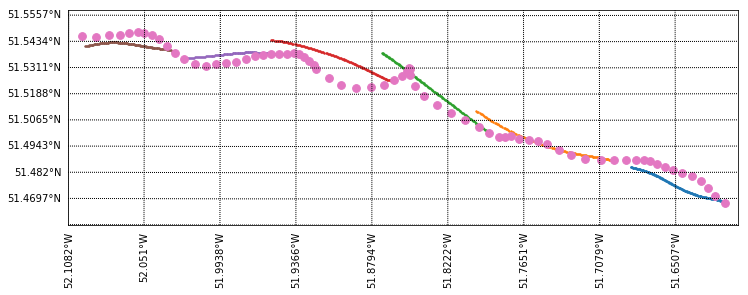

In [4]:
# for i in range(num_start_times):
#     index = np.argmin(err_dict['err'][i][:])
#     print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][3][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
#     labels = [f'{index + N*i}', 'reference']
#     sizes = [2] + [60]
#     fig, ax = sim.results.plot(labels, sizes=sizes)
labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')
labels += ['reference']
sizes = [2] * num_start_times + [60]
fig, ax = sim.results.plot(labels, sizes=sizes)

# 24 hour runs over 3 days

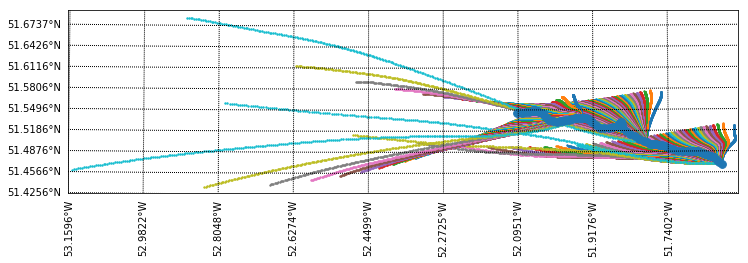

In [3]:
tc = test_case.TestCaseB()

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 3

err_dict = {'Ca': np.zeros((num_start_times, N)), 'Cw': np.zeros((num_start_times, N)), 'err': np.zeros((num_start_times, N))}

for j in range(num_start_times):
    
    #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    tc = test_case.TestCaseB24(add_timedelta=np.timedelta64(24 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = 0.001 * i * N
        Cw = 0.001 * N * N - 0.001 * i * N
        #Ca = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = Ca / 5
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)
        lats = sim.results.data[f'{i + (j * N)}']['latitude']
        lons = sim.results.data[f'{i + (j * N)}']['longitude']
        lats_lons = lats, lons
        err = calc_mean_error(lats_lons, ref_lats_lons)
        err_dict['Ca'][j][i] = Ca
        err_dict['Cw'][j][i] = Cw
        err_dict['err'][j][i] = err

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.006816593233338576, Ca: 1.4000000000000001, Cw: 1.0999999999999999
err: 0.015595329635259501, Ca: 1.25, Cw: 1.25
err: 0.00650767728760587, Ca: 0.8500000000000001, Cw: 1.65


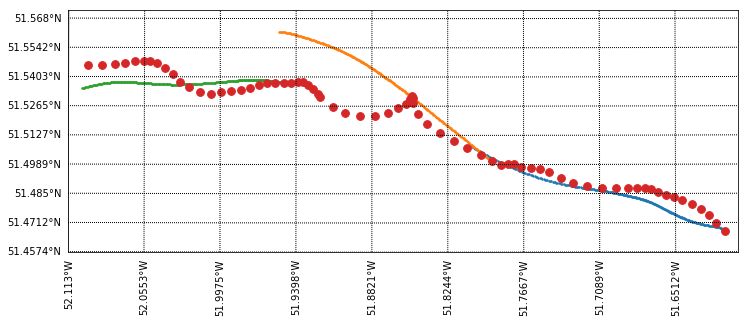

In [4]:
# for i in range(num_start_times):
#     index = np.argmin(err_dict['err'][i][:])
#     print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][3][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
#     labels = [f'{index + N*i}', 'reference']
#     sizes = [2] + [60]
#     fig, ax = sim.results.plot(labels, sizes=sizes)
labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')
labels += ['reference']
sizes = [2] * num_start_times + [60]
fig, ax = sim.results.plot(labels, sizes=sizes)

# 3 day runs

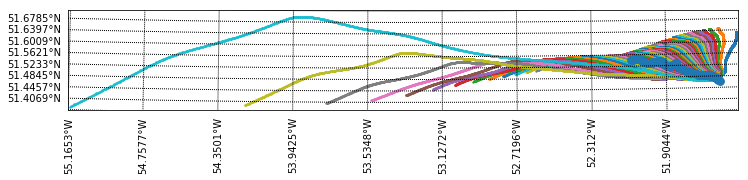

In [6]:
tc = test_case.TestCaseB()

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 1

err_dict = {'Ca': np.zeros((num_start_times, N)), 'Cw': np.zeros((num_start_times, N)), 'err': np.zeros((num_start_times, N))}

for j in range(num_start_times):
    
#     #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
#     tc = test_case.TestCaseB24(add_timedelta=np.timedelta64(24 * j, 'h'))
#     ref_lats_lons = tc.ref_lats, tc.ref_lons
#     sim.time_frame = tc.time_frame
#     sim.start_location = tc.start_location
#     sim.start_velocity = tc.start_velocity
#     sim.reload_iceberg()

    for i in range(N):

        Ca = 0.001 * i * N
        Cw = 0.001 * N * N - 0.001 * i * N
        #Ca = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = Ca / 5
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)
        lats = sim.results.data[f'{i + (j * N)}']['latitude']
        lons = sim.results.data[f'{i + (j * N)}']['longitude']
        lats_lons = lats, lons
        err = calc_mean_error(lats_lons, ref_lats_lons)
        err_dict['Ca'][j][i] = Ca
        err_dict['Cw'][j][i] = Cw
        err_dict['err'][j][i] = err

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.02926364661840528, Ca: 1.2, Cw: 1.3


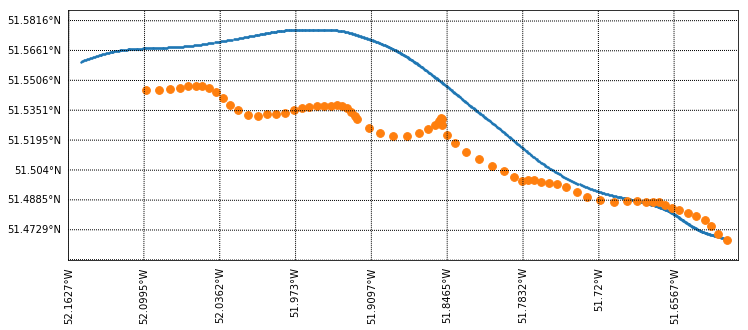

In [7]:
# for i in range(num_start_times):
#     index = np.argmin(err_dict['err'][i][:])
#     print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][3][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
#     labels = [f'{index + N*i}', 'reference']
#     sizes = [2] + [60]
#     fig, ax = sim.results.plot(labels, sizes=sizes)
labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')
labels += ['reference']
sizes = [2] * num_start_times + [60]
fig, ax = sim.results.plot(labels, sizes=sizes)

# C

# t0 + 12 hr

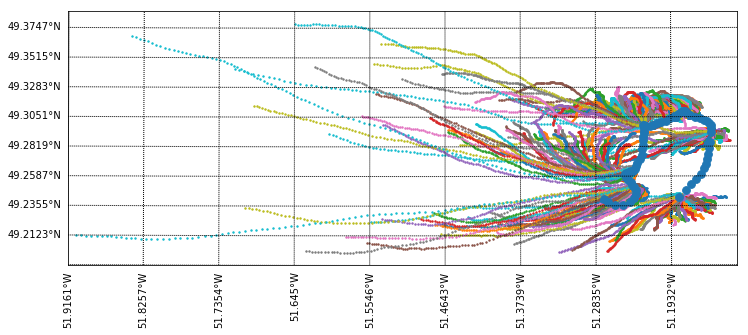

In [4]:
tc = test_case.TestCaseC(add_timedelta=np.timedelta64(12, 'h'))

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.8}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 6

err_dict = {'Ca': np.zeros((num_start_times, N)), 'Cw': np.zeros((num_start_times, N)), 'err': np.zeros((num_start_times, N))}

for j in range(num_start_times):
    
    #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    tc = test_case.TestCaseC12(add_timedelta=np.timedelta64(12, 'h') + np.timedelta64(12 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = 0.001 * i * N
        Cw = 0.001 * N * N - 0.001 * i * N
        #Ca = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = Ca / 5
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)
        lats = sim.results.data[f'{i + (j * N)}']['latitude']
        lons = sim.results.data[f'{i + (j * N)}']['longitude']
        lats_lons = lats, lons
        err = calc_mean_error(lats_lons, ref_lats_lons)
        err_dict['Ca'][j][i] = Ca
        err_dict['Cw'][j][i] = Cw
        err_dict['err'][j][i] = err

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.0195341461803188, Ca: 0.3, Cw: 2.2
err: 0.012356474655157964, Ca: 1.2, Cw: 1.3
err: 0.007816571835549659, Ca: 1.4000000000000001, Cw: 1.0999999999999999
err: 0.023732024464018307, Ca: 1.35, Cw: 1.15
err: 0.011609891778149783, Ca: 0.05, Cw: 2.45
err: 0.0024151181823038937, Ca: 0.35000000000000003, Cw: 2.15


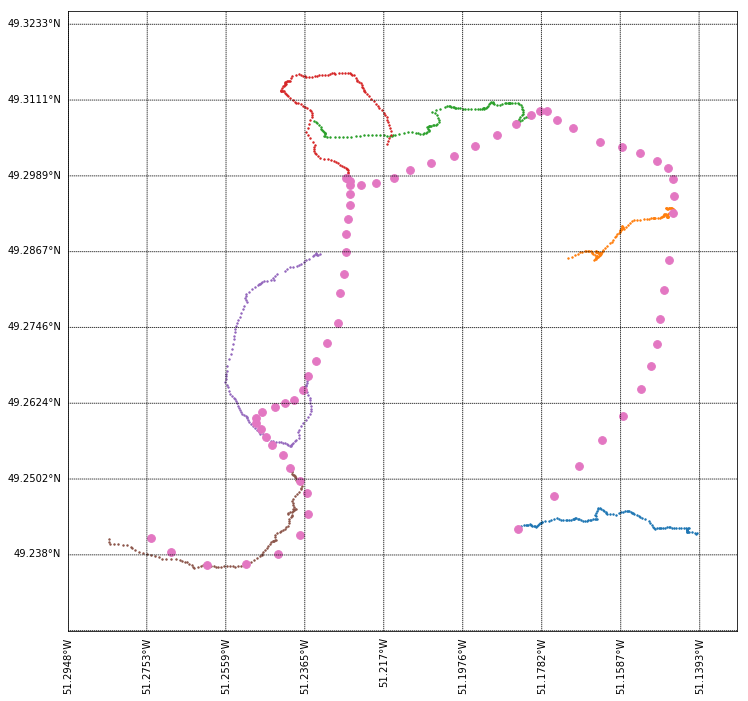

In [5]:
labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')
labels += ['reference']
sizes = [2] * num_start_times + [60]
fig, ax = sim.results.plot(labels, sizes=sizes)

# t0 + 3.5 days

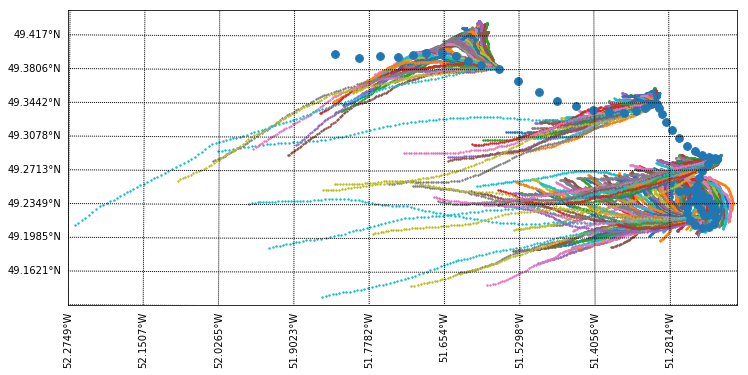

In [6]:
tc = test_case.TestCaseC(add_timedelta=np.timedelta64(12, 'h') + np.timedelta64(3, 'D'))

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

ref_lats_lons = tc.ref_lats, tc.ref_lons

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.8}

N = 50

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 6

err_dict = {'Ca': np.zeros((num_start_times, N)), 'Cw': np.zeros((num_start_times, N)), 'err': np.zeros((num_start_times, N))}

for j in range(num_start_times):
    
    #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    tc = test_case.TestCaseC12(add_timedelta=np.timedelta64(12, 'h') + np.timedelta64(3, 'D') + np.timedelta64(12 * j, 'h'))
    ref_lats_lons = tc.ref_lats, tc.ref_lons
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        Ca = 0.001 * i * N
        Cw = 0.001 * N * N - 0.001 * i * N
        #Ca = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = float(np.random.randint(low=35, high=40000, size=1) / 10000)
        #Cw = Ca / 5
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)
        lats = sim.results.data[f'{i + (j * N)}']['latitude']
        lons = sim.results.data[f'{i + (j * N)}']['longitude']
        lats_lons = lats, lons
        err = calc_mean_error(lats_lons, ref_lats_lons)
        err_dict['Ca'][j][i] = Ca
        err_dict['Cw'][j][i] = Cw
        err_dict['err'][j][i] = err

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.019995201437690537, Ca: 1.2, Cw: 1.3
err: 0.03582521235285229, Ca: 0.0, Cw: 2.5
err: 0.03911950043823617, Ca: 0.0, Cw: 2.5
err: 0.02091384714000053, Ca: 0.7000000000000001, Cw: 1.7999999999999998
err: 0.017645105133996978, Ca: 1.7000000000000002, Cw: 0.7999999999999998
err: 0.015077547862285235, Ca: 2.0500000000000003, Cw: 0.44999999999999973


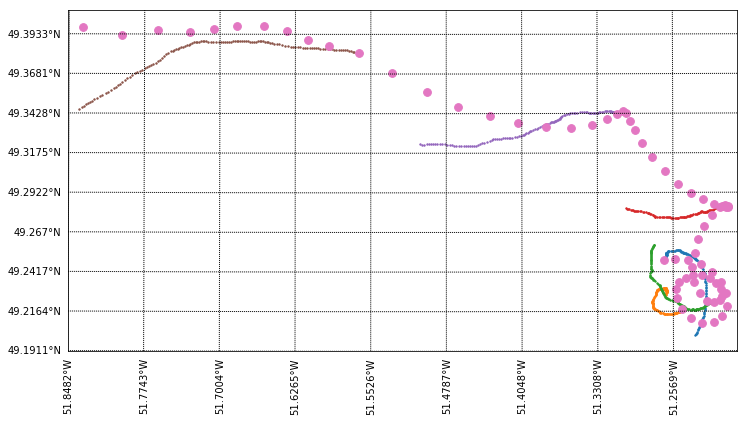

In [7]:
labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')
labels += ['reference']
sizes = [2] * num_start_times + [60]
fig, ax = sim.results.plot(labels, sizes=sizes)

err: 0.019995201437690537, Ca: 1.2, Cw: 1.3
err: 0.03582521235285229, Ca: 0.0, Cw: 2.5
err: 0.03911950043823617, Ca: 0.0, Cw: 2.5
err: 0.02091384714000053, Ca: 0.7000000000000001, Cw: 1.7999999999999998
err: 0.017645105133996978, Ca: 1.7000000000000002, Cw: 0.7999999999999998
err: 0.015077547862285235, Ca: 2.0500000000000003, Cw: 0.44999999999999973


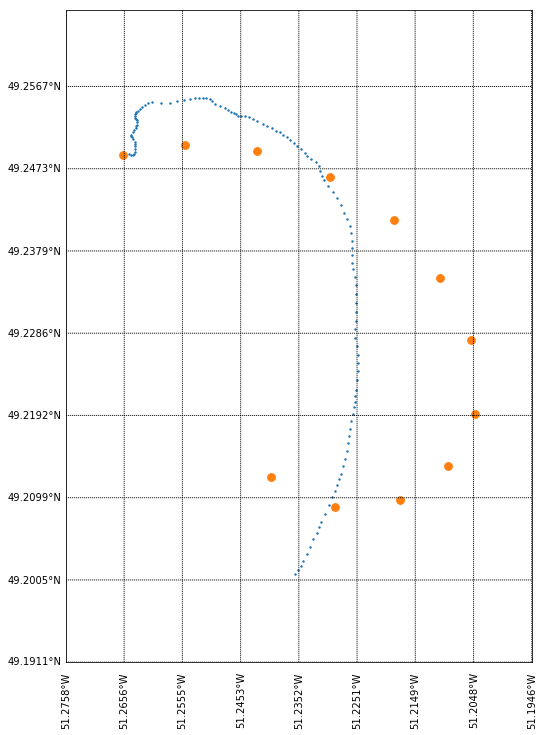

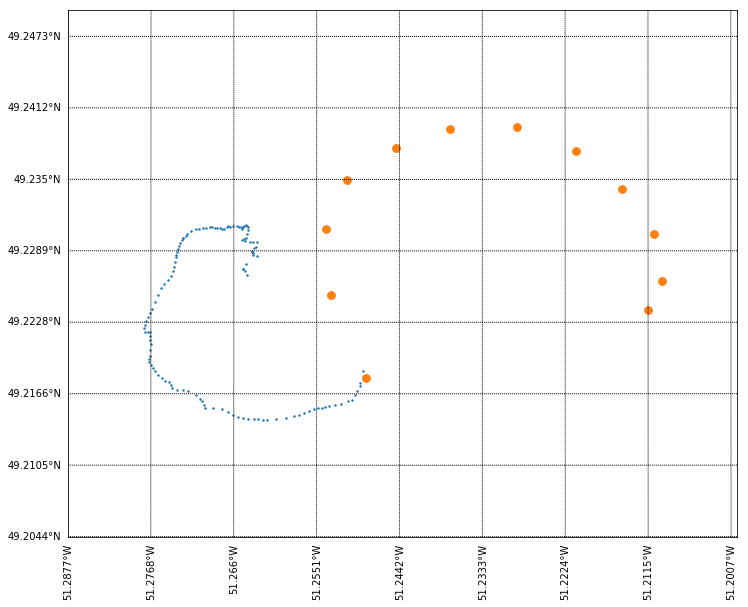

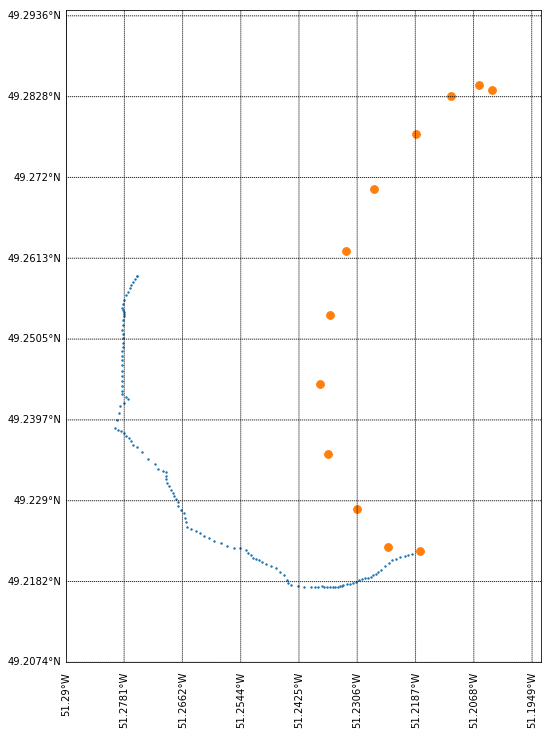

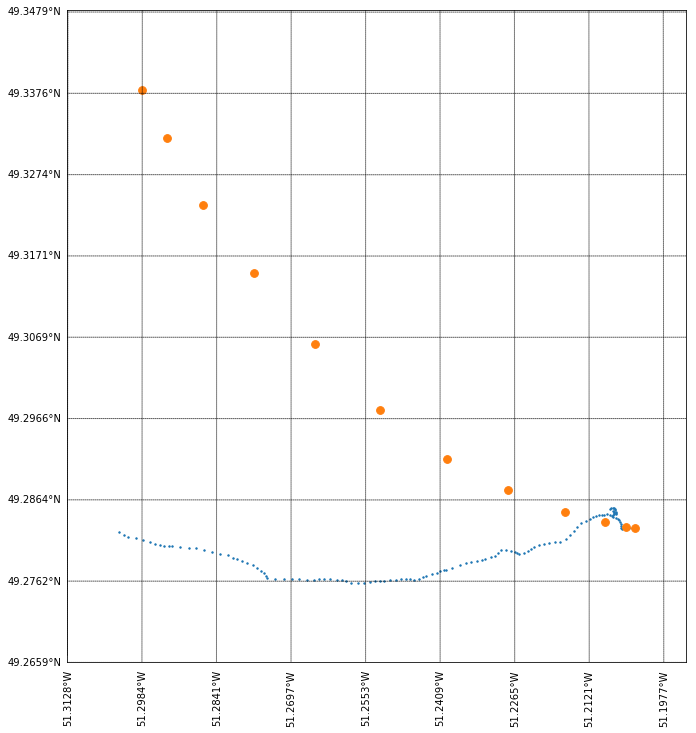

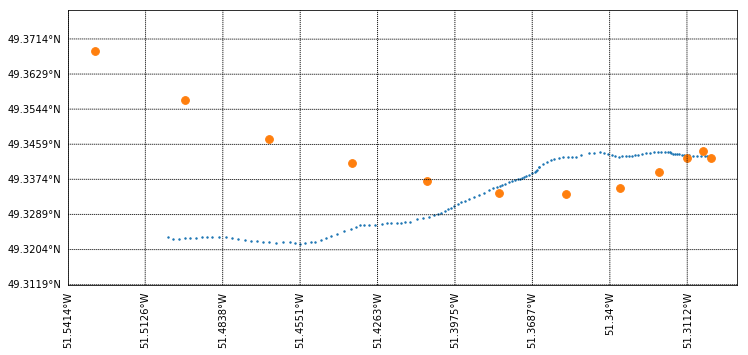

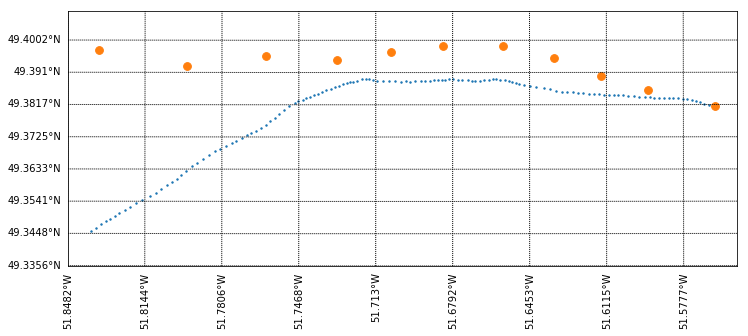

In [21]:
for i in range(1, num_start_times + 1):
    if i == 1:
        start_index = 0
        end_index = 11
    elif i == num_start_times:
        start_index = (i-1) * 12
        end_index = i * 12 - 2
    else:
        start_index = (i-1) * 12
        end_index = i * 12 - 1
        
    sim.results.data[f'ref{i}'] = sim.results.data['reference'].where(
        (sim.results.data['reference'].time <= sim.results.data['reference']['time'].values[end_index])
        & (sim.results.data['reference'].time >= sim.results.data['reference']['time'].values[start_index]), drop=True)

# labels = ['ref1']#, 'ref2', 'ref3', 'ref4']
# sizes = [60] * 4
# sim.results.plot(labels, sizes=sizes)

labels = []
for i in range(num_start_times):
    index = np.argmin(err_dict['err'][i][:])
    print('err: {}, Ca: {}, Cw: {}'.format(err_dict['err'][i][index], err_dict['Ca'][i][index], err_dict['Cw'][i][index]))
    labels.append(f'{index + N*i}')

for j in range(num_start_times):
    label = labels[j]
    sizes = [2] + [60]
    sim.results.plot([label] + [f'ref{j+1}'], sizes=sizes)

# Other

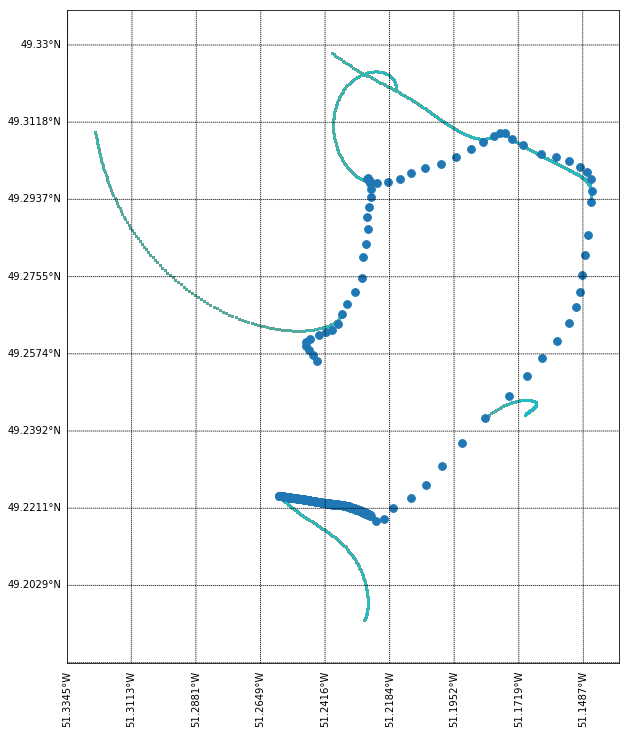

In [7]:
tc = test_case.TestCaseC(add_timedelta=np.timedelta64(12, 'h'))

sim_args = tc.time_frame, tc.start_location, tc.start_velocity
sim = simulator.Simulator(*sim_args, **{'ocean_model': 'ECMWF'})
reference_data_dict = {'time': tc.ref_times, 'latitude': tc.ref_lats.values, 'longitude': tc.ref_lons.values}
sim.results.add_from_dict(reference_data_dict, label='reference')
sim.testcase = tc

Ca, Cw = 0.1, 0.15
run_sim_kwargs = {'Ca': Ca, 'Cw': Cw, 'perturb_current': True, 'perturb_wind': True, 'smoothing_constant': 0.2}

N = 40

plt.rcParams['figure.figsize'] = (12, 12)

num_start_times = 6

for j in range(num_start_times):
    
    #tc = test_case.TestCaseB12(add_timedelta=np.timedelta64(12 * j, 'h'))
    tc = test_case.TestCaseC12(add_timedelta=np.timedelta64(12, 'h') + np.timedelta64(12 * j, 'h'))
    sim.time_frame = tc.time_frame
    sim.start_location = tc.start_location
    sim.start_velocity = tc.start_velocity
    sim.reload_iceberg()

    for i in range(N):

        #Ca = float(np.random.randint(low=35, high=200, size=1) / 100)
#         Cw = float(np.random.randint(low=35, high=200, size=1) / 100)
        #Cw = Ca / 5
        Ca = 0.2726; Cw = 0.2434
        run_sim_kwargs['Ca'] = Ca
        run_sim_kwargs['Cw'] = Cw
        sim.run_simulation(label=f'{i + (j * N)}', **run_sim_kwargs)

labels = [str(i) for i in range(N * num_start_times)] + ['reference']
sizes = [2] * N * num_start_times + [60]
markers = ['.'] * (N * num_start_times + 1)
fig, ax = sim.results.plot(labels, sizes=sizes)

In [10]:
tc.BEACON_ID

'50519'

In [11]:
tc.start_time

numpy.datetime64('2015-04-26T18:54:15.000000000')

In [21]:
tc = test_case.TestCase(beacon_id='50519', end_time=np.timedelta64(5, 'D'))

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62685bc978>)

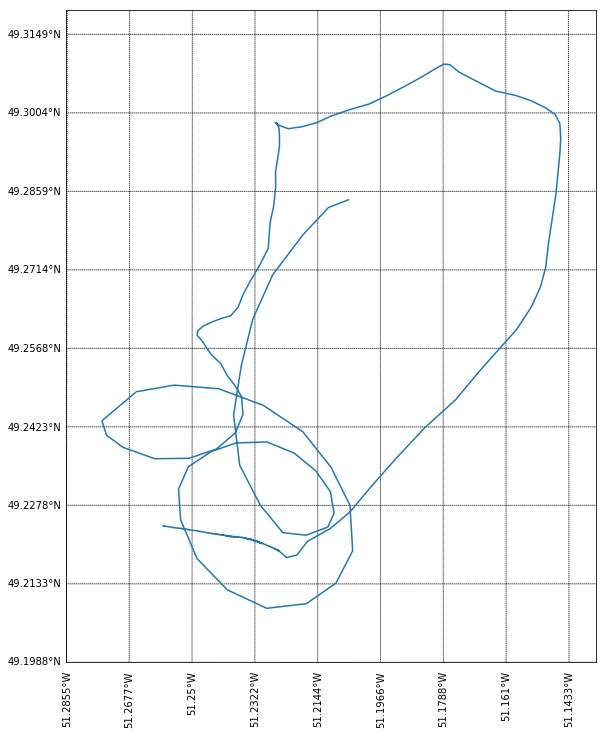

In [22]:
plot.plot_track((tc.ref_lats.values, tc.ref_lons.values), line_plot=True, sizes=60)

In [31]:
tc = test_case.TestCase(beacon_id='50519', start_time=np.datetime64('2015-04-27'), end_time=np.timedelta64(5, 'D'))

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f626818d588>)

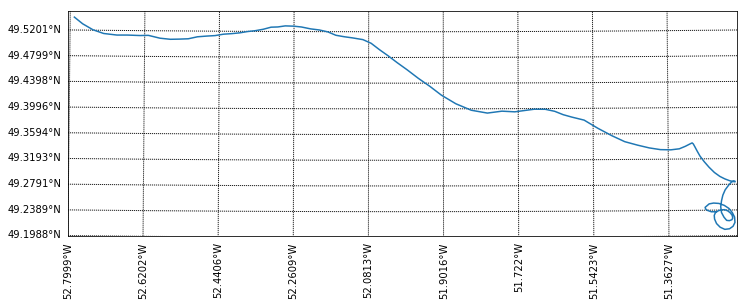

In [32]:
plot.plot_track((tc.ref_lats.values, tc.ref_lons.values), line_plot=True, sizes=60)